In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from scipy.integrate import quad
from scipy.stats import norm
from tqdm import tqdm

### Task A1.

#### dependence on N

In [2]:
def s_t(s_0, T, t, r, sigma):
    w = np.random.normal(0, t)
    return s_0 * math.exp((r - 0.5 * sigma ** 2) * (T - t) + sigma * w)

In [3]:
def teta(s_0, T, t, r, sigma, N):
    arr = []
    for i in range(N):
        arr.append(s_t(s_0, T, t, r, sigma))
    return abs(sum(arr)/len(arr) - s_0 * math.exp(r * (T - t)))

In [4]:
s_0 = 1
T = 1
t = 0.5 * T
r = 0.1
sigma = 0.03
picture = []
for i in tqdm(range(5)):
    picture.append(teta(s_0, T, t, r, sigma, 10 ** i))

100%|██████████| 5/5 [00:00<00:00, 152.96it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


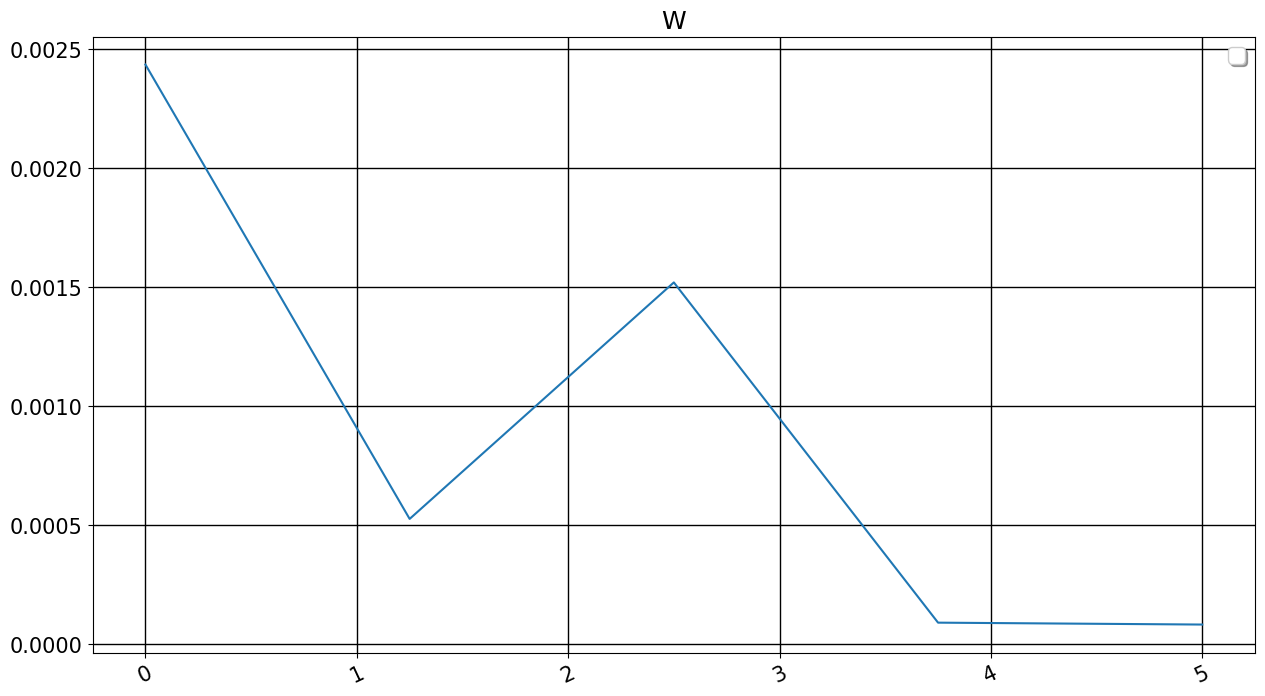

In [5]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, 5.0, num=5), picture, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

#### dependence on sigma

In [6]:
s_0 = 1
T = 1
t = 0.5 * T
r = 0.1
N = 10 ** 4
picture = []
for i in tqdm(range(1, 500)):
    picture.append(teta(s_0, T, t, r, i / 100000, N))

100%|██████████| 499/499 [00:08<00:00, 57.47it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


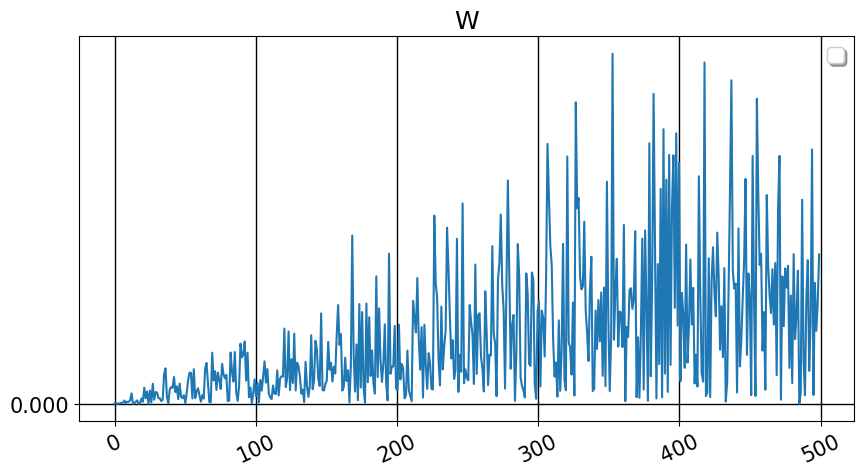

In [7]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, 499.0, num=499), picture, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title('W')
plt.show()

### Task A2.
#### dependence C(t, x) on t = 0, 0.5T, 0.8T, 0.99T

In [8]:
def normal_distribution_density(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp((- 1 / 2) * (((x - mu) / sigma) ** 2))

In [9]:
# проверяем, что интеграл подсчитан правильно
def normal_distribution_function(x, mu, sigma):
    return quad(normal_distribution_density, -np.inf, x, args=(mu,sigma))

In [10]:
def d_plus(s, sigma, T, t, r, strike): 
    return ((math.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * math.sqrt(T - t))

In [11]:
def d_minus(s, sigma, T, t, r, strike):
    return ((math.log(s / strike)) + (T - t) * (r - (sigma ** 2) / 2)) / (sigma * math.sqrt(T - t))

In [12]:
# проверяем, что d_plus и d_minus написано правильно
sigma = 0.15
T = 1
t = 0.5 * T
r = 0.1
strike = 50
s = 50
print(d_plus(s, sigma, T, t, r, strike))
d_minus(s, sigma, T, t, r, strike) - d_plus(s, sigma, T, t, r, strike)

0.5244375293800227


-0.10606601717798209

In [13]:
# цена call option
def price_call_option(s, sigma, T, t, r, strike):
    I_plus = norm.cdf(d_plus(s, sigma, T, t, r, strike))
    I_minus = norm.cdf(d_minus(s, sigma, T, t, r, strike))
    ans = s * I_plus - strike * math.exp(-1 * r * (T - t)) * I_minus
    #print(ans)
    return ans

In [14]:
s = 50
sigma = 0.1
T = 1
t = 0.5
r = 0.1
strike = 50

print(d_plus(s, sigma, T, t, r, strike))

price_call_option(s, sigma, T, t, r, strike)
print(norm.cdf(d_plus(100, 0.1, 1, 0.5, 0.1, 50)))


0.7424621202458749
1.0


In [15]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = [0, 0.0001 * T, 0.5 * T, 0.8 * T, 0.99 * T]
pictures = []
for j in range(0, 5):
    picture = []
    for i in tqdm(range(1, 100)):  
        picture.append(price_call_option(i, sigma, T, t[j], r, strike))
    pictures.append(picture)

100%|██████████| 99/99 [00:00<00:00, 3020.32it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


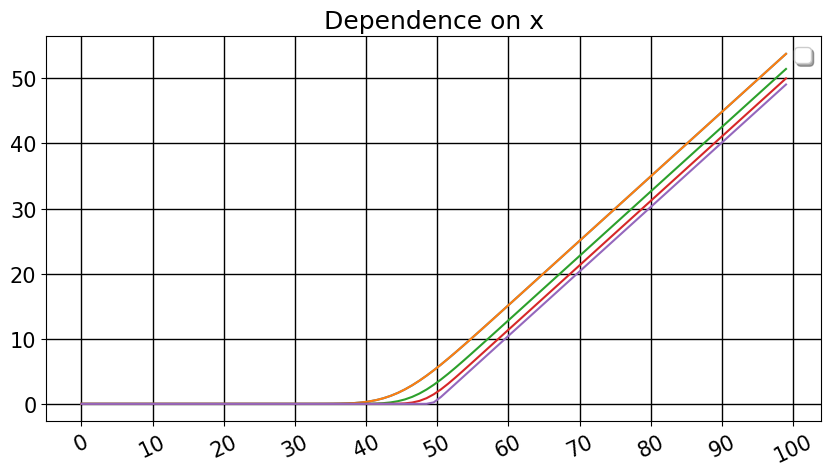

In [16]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 99.0, num=99), pictures[0], label='')
plt.plot(np.linspace(0.0, 99.0, num=99), pictures[1], label='')
plt.plot(np.linspace(0.0, 99.0, num=99), pictures[2], label='')
plt.plot(np.linspace(0.0, 99.0, num=99), pictures[3], label='')

plt.plot(np.linspace(0.0, 99.0, num=99), picture, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('Dependence on x')
plt.show()

### Task A3.

#### Search delta

In [17]:
# delta
def delta(s, sigma, T, t, r, strike):
    return norm.cdf(d_plus(s, sigma, T, t, r, strike))

In [18]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(delta(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


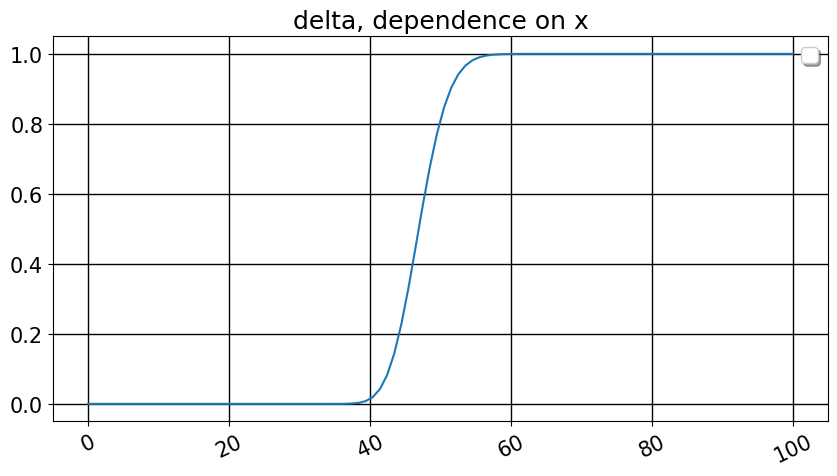

In [19]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('delta, dependence on x')
plt.show()

#### Search teta

In [20]:
def teta(s, sigma, T, t, r, strike):
    first = -1 *((s * sigma * math.exp(-(d_plus(s, sigma, T, t, r, strike) ** 2) / 2)) / (2 * math.sqrt(2 * math.pi) * (math.sqrt(T - t)))) 
    second = r * strike * math.exp(-r * (T - t)) * norm.cdf(d_plus(s, sigma, T, t, r, strike))
    return first - second


In [21]:
T = 1
r = 0.2
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(teta(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


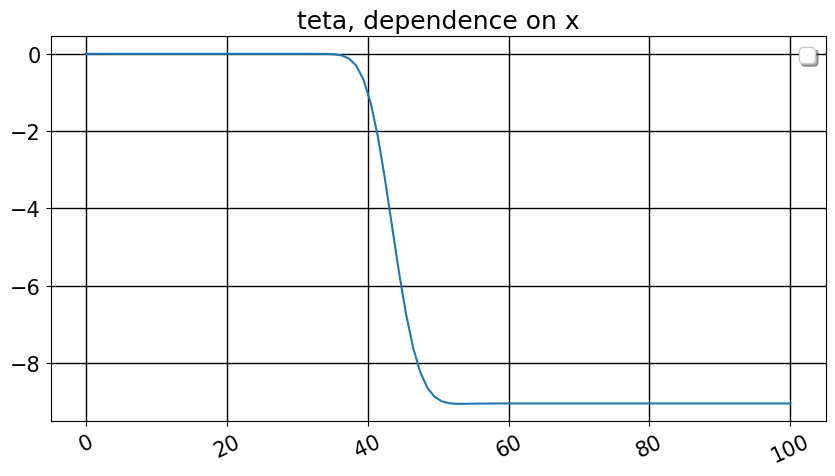

In [22]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('teta, dependence on x')
plt.show()

#### Search kappa

In [23]:
def kappa(s, sigma, T, t, r, strike):
    return -math.exp(-r * (T - t)) * norm.cdf(d_minus(s, sigma, T, t, r, strike))

In [24]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(kappa(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


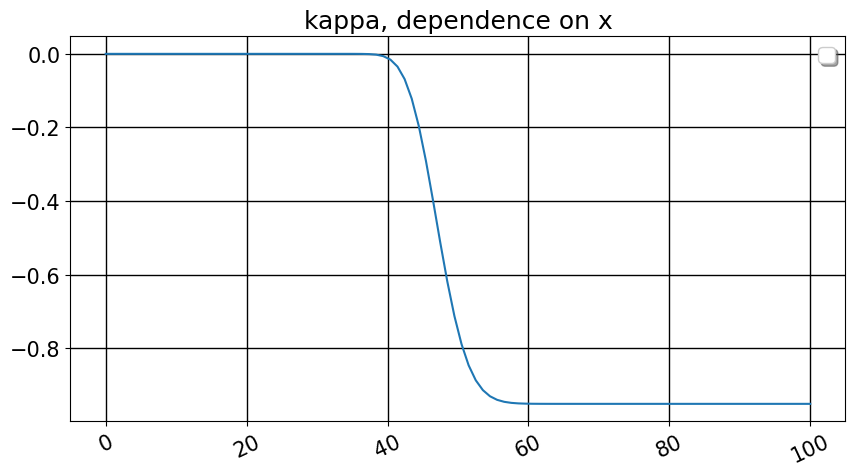

In [25]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('kappa, dependence on x')
plt.show()

### Search gamma

In [26]:
def gamma(s, sigma, T, t, r, strike):
    return math.exp((-d_plus(s, sigma, T, t, r, strike) ** 2) / 2) / (math.sqrt(2 * math.pi) * s * sigma * math.sqrt(T - t))

In [27]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(gamma(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


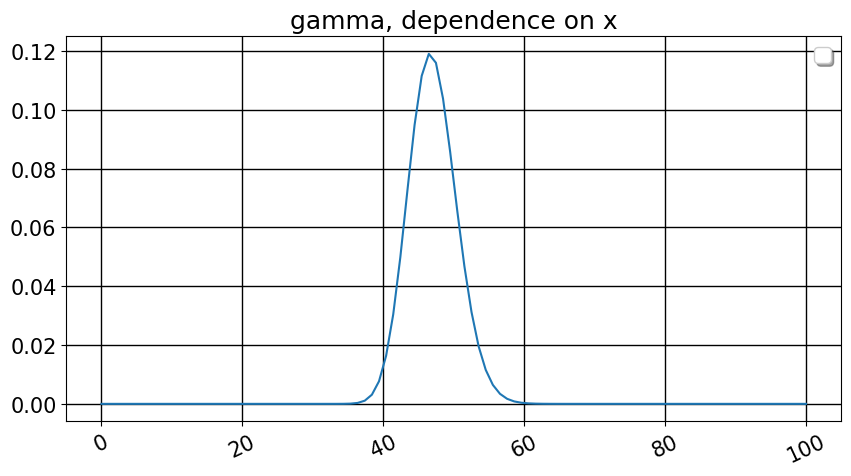

In [28]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('gamma, dependence on x')
plt.show()

### search vega

In [29]:
def vega(s, sigma, T, t, r, strike):
    return s * math.sqrt(T - t) * math.exp(-(d_plus(s, sigma, T, t, r, strike) ** 2) / 2) / math.sqrt(2 * math.pi)

In [30]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(vega(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


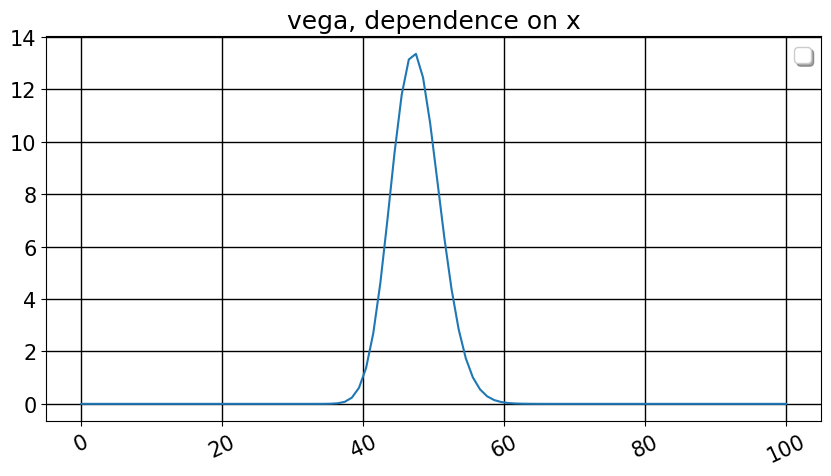

In [31]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('vega, dependence on x')
plt.show()

#### Search ro

In [32]:
def ro(s, sigma, T, t, r, strike):
    return strike * (T - t) * math.exp(-r * (T - t)) * norm.cdf(d_minus(s, sigma, T, t, r, strike))

In [33]:
T = 1
r = 0.1
sigma = 0.1
strike = 50
t = 0.5 * T
picture = []
for i in range(1, 101):
    picture.append(ro(i, sigma, T, t, r, strike))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


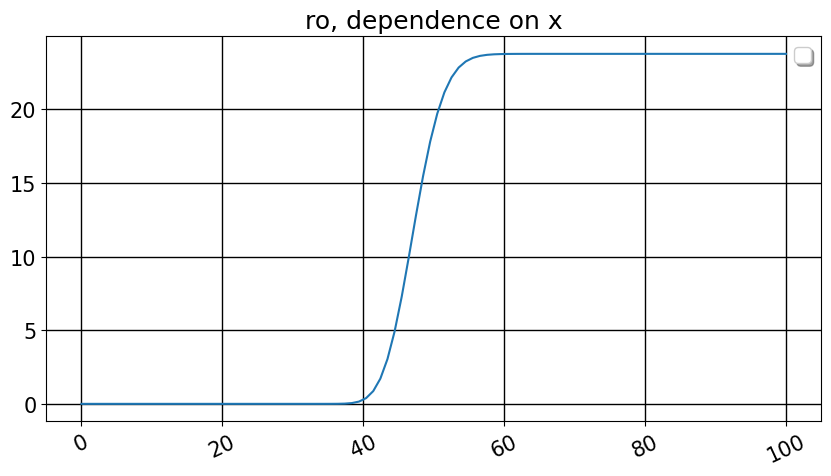

In [34]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0.0, 100, num=100), picture, label='')


ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)


plt.title('ro, dependence on x')
plt.show()